### Setup

In [2]:
using Pkg
Pkg.activate("../.")

Activating environment at `~/ml/stheno_models/Project.toml`


In [3]:
using Stheno, Plots
gr();

## Specify Problem

Specify a simple prior model

In [4]:
f = GP(eq(), GPC())

GP{Stheno.ZeroMean{Float64},Stheno.EQ}(Stheno.ZeroMean{Float64}(), Stheno.EQ(), 1, GPC(1))

Specify input locations, generate synthetic data:

In [5]:
x = randn(1_000)
σ²_n = 0.1
y = rand(f(x, σ²_n));

## Exact Inference

Visualise the exact posterior (because we can):

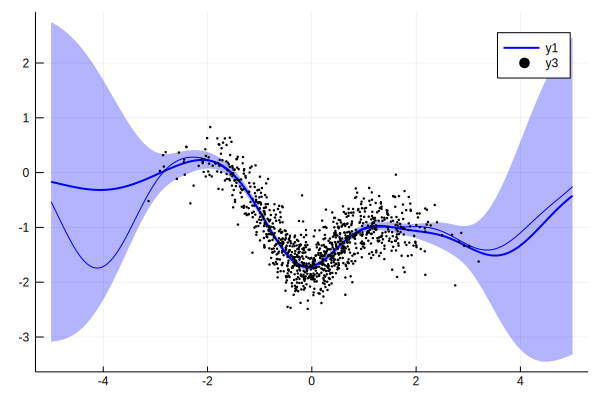

In [13]:
f_posterior = f | (f(x, σ²_n) ← y)
x_plot = collect(range(-5.0, 5.0; length=1000))
plot(f_posterior(x_plot); samples=1, color=:blue)
scatter!(x, y; markersize=1.5, markerstrokewidth=0, markercolor="black")

## Approximate Inference

Specify Pseudo-Points and compute approximate posterior:

In [15]:
using Stheno: PseudoObs
z = collect(range(-3.0, 3.0; length=50))
f_posterior_approx = f | PseudoObs(f(x, σ²_n)←y, f(x, 1e-12));

The posterior can be visualised in the same manner as before:

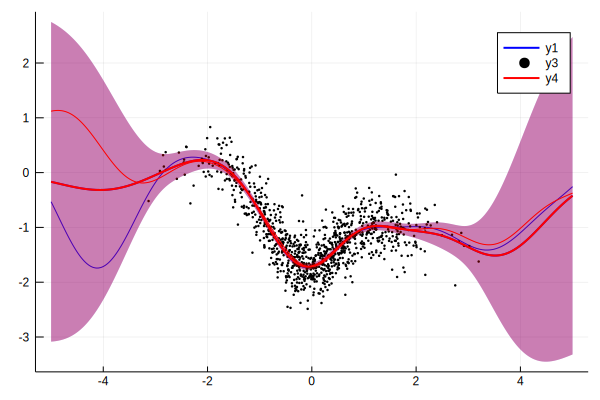

In [16]:
plot!(f_posterior_approx(x_plot); samples=1, color=:red)

### Compute logpdf and elbo

In [17]:
logpdf(f(x, σ²_n), y)

-301.5023819888208

In [18]:
elbo(f(x, σ²_n), y, f(z, 1e-12))

-301.5023820171191

In [19]:
using BenchmarkTools
display(@benchmark logpdf($f($x, $σ²_n), $y))
display(@benchmark elbo($f($x, $σ²_n), $y, $f($z, 1e-12)));

BenchmarkTools.Trial: 
  memory estimate:  22.92 MiB
  allocs estimate:  17
  --------------
  minimum time:     29.641 ms (0.00% GC)
  median time:      30.735 ms (0.00% GC)
  mean time:        32.833 ms (7.08% GC)
  maximum time:     42.790 ms (14.28% GC)
  --------------
  samples:          153
  evals/sample:     1

BenchmarkTools.Trial: 
  memory estimate:  1.32 MiB
  allocs estimate:  48
  --------------
  minimum time:     1.653 ms (0.00% GC)
  median time:      2.099 ms (0.00% GC)
  mean time:        2.186 ms (5.59% GC)
  maximum time:     7.250 ms (68.22% GC)
  --------------
  samples:          2279
  evals/sample:     1